In [37]:
#importing packages
#Majority Classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


In [38]:
#importing water potability data set
   
trainData= pd.read_csv("C:/Users/patsh/Downloads/trainWP.csv")
testData= pd.read_csv("C:/Users/patsh/Downloads/testWP.csv")
trainData.head()

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,1499,6.999765,219.143373,16078.45939,7.652135,355.688892,282.502338,17.297556,65.065069,3.360131,1
1,1264,8.575673,197.560283,15888.62521,4.865463,311.557381,464.725567,18.736927,40.224521,3.506229,0
2,1301,3.433874,152.480075,16318.73361,5.973098,313.064317,412.915539,9.970144,68.507542,4.104938,0
3,2685,8.376280,248.132861,27824.19048,7.100523,343.057975,433.449899,18.658886,53.303760,5.703963,0
4,1685,6.920389,252.352799,11086.25986,9.993376,285.744758,368.629147,17.120803,43.667082,3.277601,0


In [39]:
#separating inputs and outputs for test train data
xtrain=trainData.drop('Potability',axis=1)
ytrain=trainData['Potability']
xtest=testData.drop('Potability',axis=1)
ytest=testData['Potability']
xtrain.head()

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,1499,6.999765,219.143373,16078.45939,7.652135,355.688892,282.502338,17.297556,65.065069,3.360131
1,1264,8.575673,197.560283,15888.62521,4.865463,311.557381,464.725567,18.736927,40.224521,3.506229
2,1301,3.433874,152.480075,16318.73361,5.973098,313.064317,412.915539,9.970144,68.507542,4.104938
3,2685,8.376280,248.132861,27824.19048,7.100523,343.057975,433.449899,18.658886,53.303760,5.703963
4,1685,6.920389,252.352799,11086.25986,9.993376,285.744758,368.629147,17.120803,43.667082,3.277601


In [40]:
#training model with training data

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='hard')
ypred= clf.fit(xtrain, ytrain).predict(xtest)

In [41]:
#scoring model
print("Model score is: %.2f"% clf.score(xtest,ytest))
conf=confusion_matrix(ytest,ypred)


Model score is: 0.71


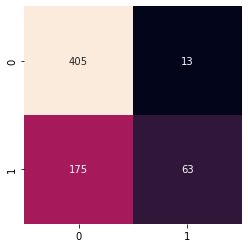

In [42]:
sns.heatmap(conf,square=True, annot=True,fmt='d',cbar=False)
plt.show()